# Modeling:

The goal of this notebook is to see whether or not the potential of two proteins to interact can be predicted or not.  The data comes from a kaggle dataset https://www.kaggle.com/datasets/spandansureja/ppi-dataset?resource=download . Containing the amino acid sequences of two proteins, and whether or not those sequences interact with one another.  I created a function that chunked the protein's composition into different qualitites, such as acidic residue count, sulfur containing residue count, etc.  Now I will run the sequences into machine learning models and see the prediction scoring via the accuracy, recall, precision, and f1 score.

In this notebook I aim to create several classifiers:

1.) Random Forest Classifier model

2.) Logistic Regression Classifier

3.) DNN Classifier Model

And with these models' performances I hope to draw some insight on what about protein compositions make protein interaction likely.

# Imports

In [1]:
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import metrics
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import random
from sklearn.linear_model import LogisticRegression

In [2]:
class preprocessing:
    
    def __init__(self, df_path):
        self.df = pd.read_csv(df_path)
        self.df = self.df.drop(columns='Unnamed: 0')
        
        
    def show(self):
        return self.df
    
    def basic(self):
        
        df = self.df
        features = list(df.columns[df.columns != 'protein_interaction'])
        
        X = df[features]
        
        y = df['protein_interaction']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 7, stratify=y)
        
        return X_train, X_test, y_train, y_test
        
    
    def standard(self):
        
        df = self.df
        
        features = list(df.columns[df.columns != 'protein_interaction'])
        
        features.remove('protein_1_seq')
        
        features.remove('protein_2_seq')
        
        X = df[features]
        
        y = df['protein_interaction']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 7, stratify=y)
        
        stan_scal = StandardScaler()
        
        X_train = stan_scal.fit_transform(X_train)
        
        X_test = stan_scal.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    
    
    def minmax(self):
        
        df = self.df
        
        features = list(df.columns[df.columns != 'protein_interaction'])
        
        features.remove('protein_1_seq')
        
        features.remove('protein_2_seq')
        
        X = df[features]
        
        y = df['protein_interaction']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 7, stratify=y)
        
        mm_scal = MinMaxScaler()
        
        X_train = mm_scal.fit_transform(X_train)
        
        X_test= mm_scal.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    
    
    
    def standard_nonsense(self):
        
        structure = {'protein_1_len':0, '1_phobic_count':0, '1_philic_count':0, '1_basic_count': 0, '1_acidic_count': 0, '1_aromatic_count':0, '1_sulfur_count': 0, 'protein_2_len':0, '2_phobic_count':0, '2_philic_count':0, '2_basic_count': 0, '2_acidic_count': 0, '2_aromatic_count':0, '2_sulfur_count': 0}
        
        new_df = pd.DataFrame(data=structure, index=[0])
        
        amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
        
        rng = np.random.default_rng()
        
        for x in range(2500):
        
            size_rng_1 =rng.integers(low=24, high=33000)
        
            seq_rng_1 = random.choices(amino_acids, k=size_rng_1)
            
            size_rng_2 =rng.integers(low=24, high=33000)
        
            seq_rng_2 = random.choices(amino_acids, k=size_rng_2)
            
            seq_hold = [seq_rng_1, seq_rng_2]
        
            p1_list = []
            p2_list = []

            for i in range(2):

                phobic = {'A':0, 'F':0, 'G':0, 'I':0, 'L':0, 'M':0, 'P':0, 'V':0, 'W':0, 'Y':0, 'phobic_total':0}
                philic = {'C':0, 'D':0, 'E':0, 'H':0, 'K':0, 'N':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'philic_total':0}
                basic = {'H':0, 'K':0, 'R':0, 'basic_total':0}
                acidic = {'D':0, 'E':0, 'acidic_total':0}
                aromatic = {'F':0, 'H':0, 'W':0, 'Y':0, 'aromatic_total':0}
                sulfur = {'C':0 , 'M':0, 'sulfur_total':0}

                seq = seq_hold[i]
                    
                seq_len = len(seq)

                for z in seq:
                    
                    if z in phobic:
                        phobic[z] += 1
                        phobic['phobic_total'] += 1

                    if z in philic:
                        philic[z] += 1
                        philic['philic_total'] += 1

                    if z in basic:
                        basic[z] += 1
                        basic['basic_total'] += 1

                    if z in acidic:
                        acidic[z] += 1
                        acidic['acidic_total'] += 1

                    if z in aromatic:
                        aromatic[z] += 1
                        aromatic['aromatic_total'] += 1

                    if z in sulfur:
                        sulfur[z] += 1
                        sulfur['sulfur_total'] += 1


                if i == 0:

                    p1_list = [seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]

                elif i != 0:

                    p2_list = [seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]

            tot_list = p1_list + p2_list
            col_list = [k for k,v in structure.items()]

            moving_dict = dict(zip(col_list, tot_list))

            moving_df = pd.DataFrame(data = moving_dict, index= [0])

            new_df = pd.concat([new_df, moving_df], axis = 0)
            
        new_df = new_df.reset_index(drop=True)
        
        new_df = new_df.drop(index=[0])
        
        zeros_ones = (rng.integers(low=0, high=2, size=2500)).tolist()
            
        new_df['protein_interaction'] = zeros_ones
        
        #return new_df
        
        features = list(new_df.columns[new_df.columns != 'protein_interaction'])
            
        X = new_df[features]
        
        y = new_df['protein_interaction']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 7, stratify=y)
        
        stan_scal = StandardScaler()
        
        X_train = stan_scal.fit_transform(X_train)
        
        X_test = stan_scal.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    
    
    
    def minmax_nonsense(self):
        
        structure = {'protein_1_len':0, '1_phobic_count':0, '1_philic_count':0, '1_basic_count': 0, '1_acidic_count': 0, '1_aromatic_count':0, '1_sulfur_count': 0, 'protein_2_len':0, '2_phobic_count':0, '2_philic_count':0, '2_basic_count': 0, '2_acidic_count': 0, '2_aromatic_count':0, '2_sulfur_count': 0}
        
        new_df = pd.DataFrame(data=structure, index=[0])
        
        amino_acids = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
        
        rng = np.random.default_rng()
        
        for x in range(2500):
        
            size_rng_1 =rng.integers(low=24, high=33000)
        
            seq_rng_1 = random.choices(amino_acids, k=size_rng_1)
            
            size_rng_2 =rng.integers(low=24, high=33000)
        
            seq_rng_2 = random.choices(amino_acids, k=size_rng_2)
            
            seq_hold = [seq_rng_1, seq_rng_2]
        
            p1_list = []
            p2_list = []

            for i in range(2):

                phobic = {'A':0, 'F':0, 'G':0, 'I':0, 'L':0, 'M':0, 'P':0, 'V':0, 'W':0, 'Y':0, 'phobic_total':0}
                philic = {'C':0, 'D':0, 'E':0, 'H':0, 'K':0, 'N':0, 'Q':0, 'R':0, 'S':0, 'T':0, 'philic_total':0}
                basic = {'H':0, 'K':0, 'R':0, 'basic_total':0}
                acidic = {'D':0, 'E':0, 'acidic_total':0}
                aromatic = {'F':0, 'H':0, 'W':0, 'Y':0, 'aromatic_total':0}
                sulfur = {'C':0 , 'M':0, 'sulfur_total':0}

                seq = seq_hold[i]
                    
                seq_len = len(seq)

                for z in seq:
                    
                    if z in phobic:
                        phobic[z] += 1
                        phobic['phobic_total'] += 1

                    if z in philic:
                        philic[z] += 1
                        philic['philic_total'] += 1

                    if z in basic:
                        basic[z] += 1
                        basic['basic_total'] += 1

                    if z in acidic:
                        acidic[z] += 1
                        acidic['acidic_total'] += 1

                    if z in aromatic:
                        aromatic[z] += 1
                        aromatic['aromatic_total'] += 1

                    if z in sulfur:
                        sulfur[z] += 1
                        sulfur['sulfur_total'] += 1


                if i == 0:

                    p1_list = [seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]

                elif i != 0:

                    p2_list = [seq_len, phobic['phobic_total'], philic['philic_total'], basic['basic_total'], acidic['acidic_total'], aromatic['aromatic_total'], sulfur['sulfur_total']]

            tot_list = p1_list + p2_list
            col_list = [k for k,v in structure.items()]

            moving_dict = dict(zip(col_list, tot_list))

            moving_df = pd.DataFrame(data = moving_dict, index= [0])

            new_df = pd.concat([new_df, moving_df], axis = 0)
            
        new_df = new_df.reset_index(drop=True)
        
        new_df = new_df.drop(index=[0])
        
        zeros_ones = (rng.integers(low=0, high=2, size=2500)).tolist()
            
        new_df['protein_interaction'] = zeros_ones
        
        #return new_df
        
        features = list(new_df.columns[new_df.columns != 'protein_interaction'])
            
        X = new_df[features]
        
        y = new_df['protein_interaction']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 7, stratify=y)
        
        mm_scal = MinMaxScaler()
        
        X_train = mm_scal.fit_transform(X_train)
        
        X_test= mm_scal.transform(X_test)
        
        return X_train, X_test, y_train, y_test
        
        
        
    

In [3]:
data = preprocessing('feature_engineered.csv')

In [4]:
data.show().head()

,protein_1_seq,protein_1_len,1_phobic_count,1_philic_count,1_basic_count,1_acidic_count,1_aromatic_count,1_sulfur_count,protein_2_seq,protein_2_len,2_phobic_count,2_philic_count,2_basic_count,2_acidic_count,2_aromatic_count,2_sulfur_count,protein_interaction
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,568,243,325,98,73,56,44,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,260,120,140,40,25,30,26,1
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,255,136,119,39,20,32,10,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,2414,1189,1225,277,178,170,169,1
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,419,175,244,71,73,23,23,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,538,252,286,77,87,53,30,1
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,885,424,461,143,114,92,32,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,95,47,48,13,12,10,4,1
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,2322,1315,1007,242,257,220,38,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,191,99,92,25,24,18,8,1


# Instantiate the Results for Comparison

# 1.) Random Forest Classifier

In [14]:
grid_params = {'n_estimators':[50, 100, 200, 300, 500], 'criterion':['gini','entropy','log_loss'] }

gscv_rfc = GridSearchCV(RandomForestClassifier(), param_grid=grid_params, cv=5, scoring='accuracy')

rfc = gscv_rfc.fit(data.standard()[0],data.standard()[2])

print (rfc.best_params_)
print (rfc.best_score_)

{'criterion': 'entropy', 'n_estimators': 500}
0.9642026675585637


In [15]:
y_pred = rfc.predict(data.standard()[1])

In [16]:
rf_accuracy = accuracy_score(data.standard()[3], y_pred)
rf_precision = precision_score(data.standard()[3], y_pred, average='weighted')
rf_recall = recall_score(data.standard()[3], y_pred, average='weighted')
rf_f1 = f1_score(data.standard()[3], y_pred, average='weighted')
rf_cm = confusion_matrix(data.standard()[3], y_pred)
print (rf_accuracy)
print(rf_precision)
print (rf_recall)
print (rf_f1)
print (rf_cm)

0.9690876761045001
0.9693737282187291
0.9690876761045001
0.9690837719448687
[[10740   204]
 [  474 10515]]


Now lets try with the nonsense data

In [8]:
grid_params = {'n_estimators':[50, 100, 200, 300, 500], 'criterion':['gini','entropy','log_loss'] }

gscv_rfc = GridSearchCV(RandomForestClassifier(), param_grid=grid_params, cv=5, scoring='accuracy')

rfc = gscv_rfc.fit(data.standard_nonsense()[0],data.standard_nonsense()[2])

print (rfc.best_params_)
print (rfc.best_score_)

{'criterion': 'log_loss', 'n_estimators': 50}
0.49428571428571433


In [9]:
y_pred = rfc.predict(data.standard_nonsense()[1])

In [11]:
rf_accuracy = accuracy_score(data.standard_nonsense()[3], y_pred)
rf_precision = precision_score(data.standard_nonsense()[3], y_pred, average='weighted')
rf_recall = recall_score(data.standard_nonsense()[3], y_pred, average='weighted')
rf_f1 = f1_score(data.standard_nonsense()[3], y_pred, average='weighted')
rf_cm = confusion_matrix(data.standard_nonsense()[3], y_pred)
print (rf_accuracy)
print(rf_precision)
print (rf_recall)
print (rf_f1)
print (rf_cm)

0.5026666666666667
0.5035641025641026
0.4826666666666667
0.4852381744784445
[[200 180]
 [190 180]]


This is fairly strong evidence that there is a true pattern found within the data, vs the randomly assembled protein sequences. something to consider however: the amount of data that the model trained on first is 50000 observations, and in the second it is 1750 observations.  Potentially the amount of protein sequences selected should be reduced in order to make this comparison more truthful.

# 2.) Logistic Regression

In [27]:
grid_params = {'C':[1, 10, 100, 1000], 'tol':[.0001, .001], 'max_iter':[500,750,1000], 'solver':['liblinear','newton-cholesky','saga'] }

gscv_lrc = GridSearchCV(LogisticRegression(), param_grid=grid_params, cv=5, scoring='accuracy')

lrc = gscv_lrc.fit(data.standard()[0],data.standard()[2])

print (lrc.best_params_)
print (lrc.best_score_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max

{'C': 1000, 'max_iter': 500, 'solver': 'newton-cholesky', 'tol': 0.0001}
0.6338393035261813


In [24]:
y_pred = lrc.predict(data.standard()[1])

In [26]:
lr_accuracy = accuracy_score(data.standard()[3], y_pred)
lr_precision = precision_score(data.standard()[3], y_pred, average='weighted')
lr_recall = recall_score(data.standard()[3], y_pred, average='weighted')
lr_f1 = f1_score(data.standard()[3], y_pred, average='weighted')
lr_cm = confusion_matrix(data.standard()[3], y_pred)
print (lr_accuracy)
print(lr_precision)
print (lr_recall)
print (lr_f1)
print (lr_cm)

0.6332011124789131
0.6356003475706972
0.6332011124789131
0.6316870877666726
[[7636 3308]
 [4737 6252]]


# 3.) Deep Neural Network

In [5]:
X_train = tf.convert_to_tensor(data.standard()[0])
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)


y_train = tf.reshape(data.standard()[2], [len(data.standard()[2]), 1])
y_test = tf.reshape(data.standard()[3], [len(data.standard()[3]), 1])

def get_basic_model():
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(30, activation='tanh'),
        tf.keras.layers.Dense(15, activation='sigmoid'),
        tf.keras.layers.Dense(15, activation='sigmoid'),
        tf.keras.layers.Dense(1)
      ])

    model.compile(optimizer='adam',
                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                    metrics=['accuracy', 'precision', 'recall'])
    return model

In [6]:
def dnn_optimize(X_train, y_train, epochs):
    for x in epochs:
            model = get_basic_model()
            hist=model.fit(X_train, y_train, epochs=x, validation_split=.2, batch_size=16, verbose=False)
                
            
            plt.plot(hist.history['accuracy'], label='accuracy')
            plt.plot(hist.history['precision'], label='precision')
            plt.plot(hist.history['recall'], label='recall')
            plt.legend()
            plt.xlabel('epochs')
            plt.ylabel('statistic')
            plt.title(f'{x} epochs for DNN model')
            plt.show()

In [7]:
epochs=[25, 50, 100,150]

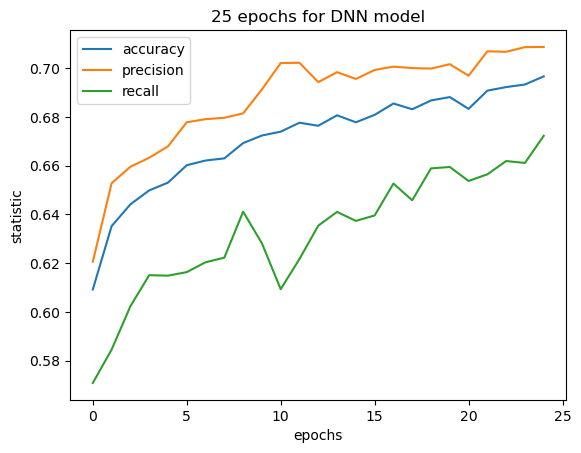

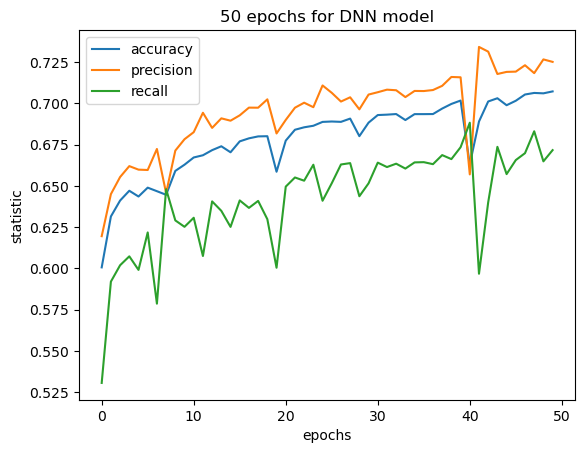

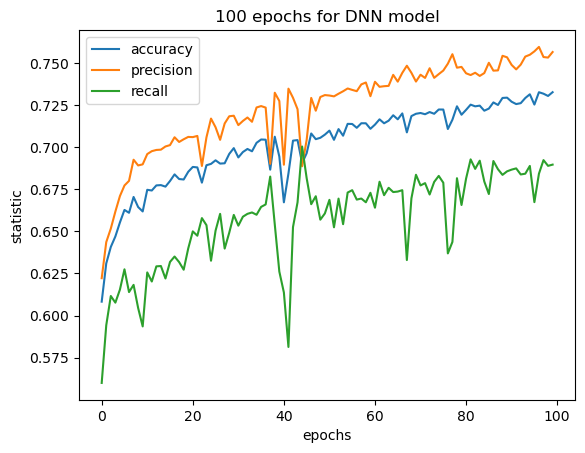

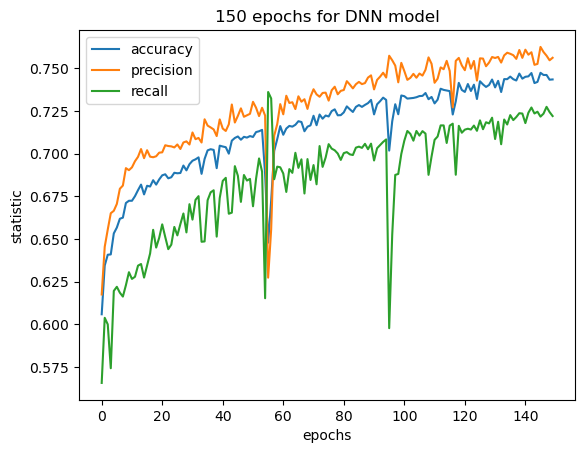

In [8]:
dnn_trial = dnn_optimize(data.standard()[0], data.standard()[2], epochs)

In [7]:
model = get_basic_model()
hist=model.fit(X_train, y_train, epochs=150, validation_split=.2, batch_size=16, verbose=False)

In [10]:
print (hist.history['recall'])

[0.532610297203064, 0.6062448620796204, 0.6108652353286743, 0.6246291399002075, 0.616215169429779, 0.6167015433311462, 0.5440396666526794, 0.5900977849960327, 0.6502602100372314, 0.6319245100021362, 0.6273041367530823, 0.6223432421684265, 0.5963717699050903, 0.6228296160697937, 0.6282281875610352, 0.6305140852928162, 0.6203492283821106, 0.6302222609519958, 0.6343563199043274, 0.6391226053237915, 0.6484120488166809, 0.6269150376319885, 0.6473420262336731, 0.6230241656303406, 0.6395117044448853, 0.6453966498374939, 0.6493360996246338, 0.6576528549194336, 0.6549292206764221, 0.6576528549194336, 0.6444725394248962, 0.6580905318260193, 0.6393657922744751, 0.6610573530197144, 0.6697145104408264, 0.6370312571525574, 0.6582850813865662, 0.6641213893890381, 0.6711735725402832, 0.6705899238586426, 0.66995769739151, 0.6684013605117798, 0.6731676459312439, 0.6666504740715027, 0.6756480932235718, 0.6838675141334534, 0.6791012287139893, 0.6413112282752991, 0.6797820925712585, 0.6563882827758789, 0.6

In [11]:
y_pred = model.predict(data.standard()[1])

686/686 ━━━━━━━━━━━━━━━━━━━━ 0s 240us/step


In [12]:
y_test.shape

TensorShape([21933, 1])

In [13]:
print (y_test[:10])

tf.Tensor(
[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]], shape=(10, 1), dtype=int64)


In [14]:
y_pred.shape

(21933, 1)

In [16]:
print (y_pred[:20])

[[0.36668095]
 [0.3503345 ]
 [0.5247016 ]
 [0.44395643]
 [0.35935593]
 [0.29963166]
 [0.26657432]
 [0.30478898]
 [1.1417073 ]
 [0.6911943 ]
 [0.47487903]
 [0.37674934]
 [0.25537473]
 [0.5760163 ]
 [0.79806936]
 [0.69560707]
 [0.89223087]
 [0.87365407]
 [0.46550792]
 [0.4979207 ]]


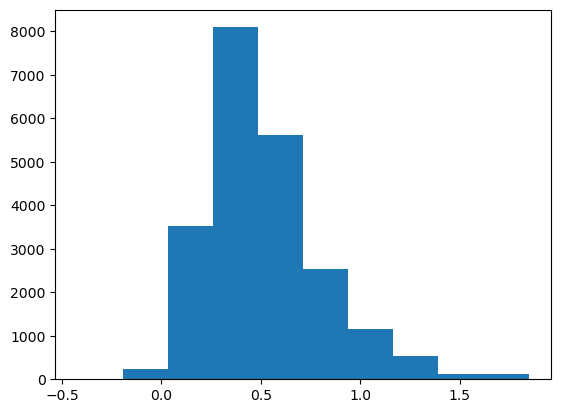

In [17]:
plt.hist(np.array(y_pred))
plt.show()

In [26]:
y_pred_corrected = []

for x in y_pred:
    if x < .5:
        y_pred_corrected.append(0)
    else:
        y_pred_corrected.append(1)

In [28]:
y_pred_corrected = np.array(y_pred_corrected)

In [32]:
dnn_accuracy = accuracy_score(y_test, y_pred_corrected)
dnn_precision = precision_score(y_test, y_pred_corrected, average='weighted')
dnn_recall = recall_score(y_test, y_pred_corrected, average='weighted')
dnn_f1 = f1_score(y_test, y_pred_corrected, average='weighted')
dnn_cm = confusion_matrix(y_test, y_pred_corrected)

print (dnn_accuracy)
print(dnn_precision)
print (dnn_recall)
print (dnn_f1)
print (dnn_cm)


0.7278530068846031
0.7313898700972243
0.7278530068846031
0.7268633563413995
[[8631 2313]
 [3656 7333]]


# Summary:

In this modeling step I found that with a random forest classifier, protein pair interactions were predictable up to 97% of the time (97% accuracy).  The f1 score provided a reasonable basis to believe that the model was performing very well (.97 with the test data).

The Deep Neural Network and Logistic Regression Classifier did not seem to perform quite as well, with logistic regression being close to flipping a coin, and the DNN performing around a 70% accuracy and 70% f1 score. 